In [ ]:
#i) Plot a graph of accuracy vs. the number of hidden units.(64,128,256,512)
#ii) Plot a graph of accuracy vs. activation function.(Relu,logistic sigmoid,tanh,leaky Relu)
#iii) Plot a graph comparing the following three loss functions vs accuracy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:


#Check observation one by one different dataset remove comment part and see observations


data = pd.read_csv("https://raw.githubusercontent.com/psantul/Dataset/main/data.csv", encoding='latin-1')
#data = pd.read_csv("https://raw.githubusercontent.com/psantul/Dataset/main/titanic.csv",delimiter = ',', encoding='latin-1')
print(data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
x = data.iloc[:,3:].values
y = data.iloc[:,1].values

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 29)
(455,)
(114, 29)
(114,)


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
np.unique(y_train)

array([0, 1])

In [ ]:
nn_input_dim = X_train.shape[1]
nn_output_dim = len(np.unique(y_train))
lr = 0.01

In [ ]:
# helper function to calculate total loss on the dataset
def calculate_loss(model, X, y):
  num_examples = X.shape[0]
  W1 = model['W1']
  b1 = model['b1']
  W2 = model['W2']
  b2 = model['b2']
  # forward propagation to calculate out predictions
  z1 = X.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  exp_scores = np.exp(z2)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
  # Calculating the loss
  corect_logprobs = -np.log(probs[range(num_examples), y])
  data_loss = np.sum(corect_logprobs)
  return 1. / num_examples * data_loss

In [ ]:
def predict(model, x):
  W1 = model['W1']
  b1 = model['b1']
  W2 = model['W2']
  b2 = model['b2']
  

  # Forward propagation
  z1 = x.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  exp_scores = np.exp(z2)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
  return np.argmax(probs, axis=1)

In [ ]:
# (Relu,logistic sigmoid,tanh,leaky Relu) 

def relu(x):
  x[x<0]=0
  return x

def logsig(x):
  return 1/(1 + np.exp(-x))

def tanh(x):
  return np.tanh(x)

def leaky_relu(x):
  x[x<0] *= 0.01
  return x

def build_model(X, y, nn_hdim, num_passes = 10000, print_loss=False):
  
  num_examples = X.shape[0]
  np.random.seed(0)
  W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
  b1 = np.zeros((1, nn_hdim))
  W2 = np.random.rand(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
  b2 = np.zeros((1, nn_output_dim))
  model = {}
  losses = []
  
  # Gradient descent. for each batch
  for i in range(0, num_passes):
    
    
    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(np.array(exp_scores), axis=1, keepdims=True)

    # Backpropagation
    delta3 = np.array(probs)
    delta3[range(num_examples), y] -= 1
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)
    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
    dW1 = np.dot(X.T, delta2)
    db1 = np.sum(delta2, axis=0)

    # Gradient descent parameter update
    W1 += -lr * dW1
    b1 += -lr * db1
    W2 += -lr * dW2
    b2 += -lr * db2
    
    
    # Assign new parameters to the model
    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    
    if print_loss and i % 1000 == 0:
      loss = calculate_loss(model, X, y)
      losses.append(loss)
      print("Loss after iteration %i: %f" % (i, loss))

  return model, losses


 for 64 number of nodes
Loss after iteration 0: 34.857809
Loss after iteration 1000: 39.801998
Loss after iteration 2000: 78.826098
Loss after iteration 3000: 38.325864
Loss after iteration 4000: 74.413021
Loss after iteration 5000: 96.303422
Loss after iteration 6000: 79.858234
Loss after iteration 7000: 76.138892
Loss after iteration 8000: 13.618923
Loss after iteration 9000: 132.255921

 for 128 number of nodes
Loss after iteration 0: 70.733648
Loss after iteration 1000: 9.831349
Loss after iteration 2000: 6.627268
Loss after iteration 3000: 202.946604
Loss after iteration 4000: 185.200636
Loss after iteration 5000: 22.813713
Loss after iteration 6000: 57.549170
Loss after iteration 7000: 81.761277
Loss after iteration 8000: 182.897264
Loss after iteration 9000: 187.984353

 for 256 number of nodes
Loss after iteration 0: 73.987556


<ipython-input-14-85efc97c068e>:36: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(z2)
<ipython-input-14-85efc97c068e>:37: RuntimeWarning: invalid value encountered in true_divide
  probs = exp_scores / np.sum(np.array(exp_scores), axis=1, keepdims=True)


Loss after iteration 1000: nan
Loss after iteration 2000: nan
Loss after iteration 3000: nan
Loss after iteration 4000: nan
Loss after iteration 5000: nan
Loss after iteration 6000: nan
Loss after iteration 7000: nan
Loss after iteration 8000: nan
Loss after iteration 9000: nan

 for 512 number of nodes
Loss after iteration 0: 136.086092
Loss after iteration 1000: nan
Loss after iteration 2000: nan
Loss after iteration 3000: nan
Loss after iteration 4000: nan
Loss after iteration 5000: nan
Loss after iteration 6000: nan
Loss after iteration 7000: nan
Loss after iteration 8000: nan
Loss after iteration 9000: nan


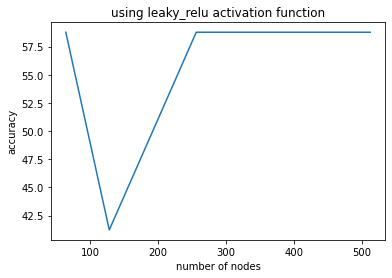

In [ ]:
x = []
y = []

for nodes in [64, 128, 256, 512]:
  print('\n for {} number of nodes'.format(nodes))
  model, loss = build_model((X_train),(y_train), nodes, print_loss=True)
  preds = predict(model, X_test)
  acc = ((preds == y_test).sum() / len(y_test)) * 100
  x.append(nodes)
  y.append(acc)

plt.xlabel('number of nodes')
plt.ylabel('accuracy')
plt.title('using {} activation function'.format('leaky_relu'))  # place of relu changes logsig,tanh,leaky_relu: Different loss result shown in graph and accuracy
plt.plot(x, y)